# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In this project, I’ll be focusing on US Data Analyst roles.

## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [108]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

# Loading Data
df = pd.read_csv("D:\\python-data-project\\dataset\\data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

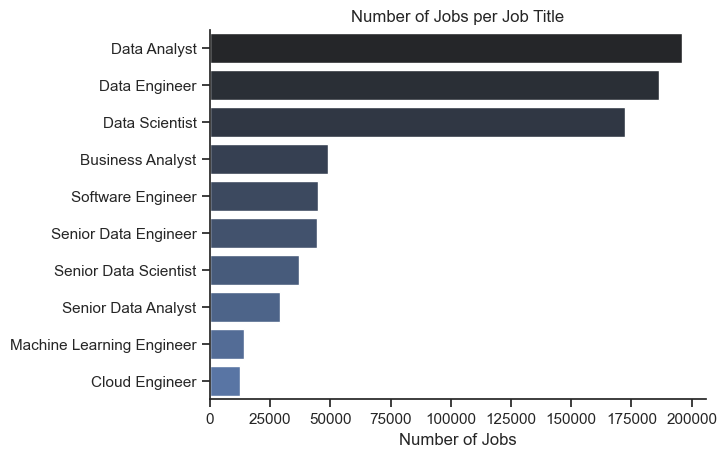

In [109]:
df_plot = df['job_title_short'].value_counts().reset_index()
df_plot.columns = ['job_title_short', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', dodge=False)
plt.legend().set_visible(False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Countries to Explore

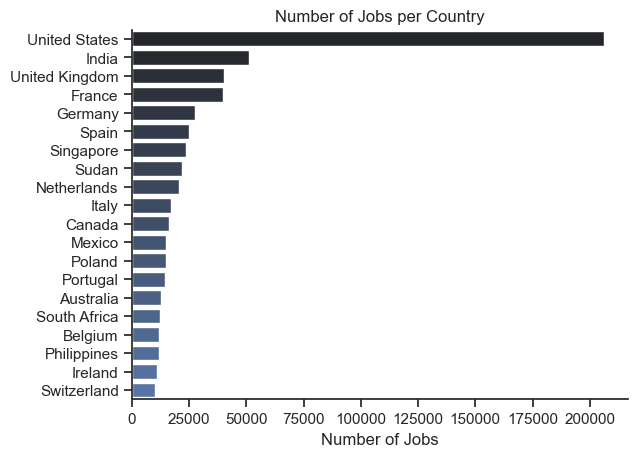

In [110]:
df_plot = df['job_country'].value_counts().reset_index().head(20)
df_plot.columns = ['job_country', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', dodge=False)
plt.legend().set_visible(False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Companies to Explore

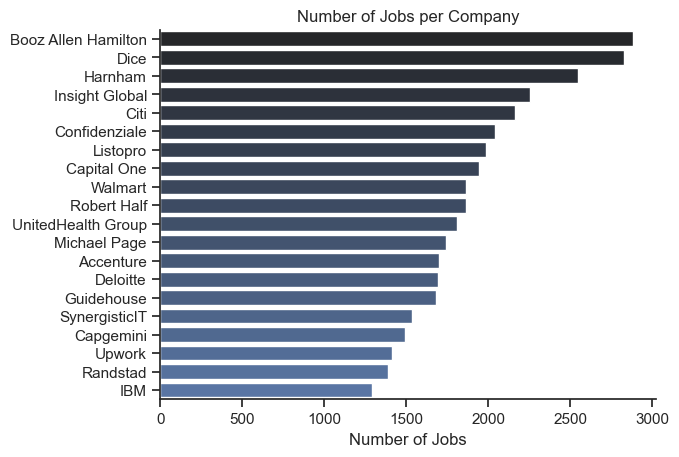

In [111]:
df_plot = df['company_name'].value_counts().reset_index()[1:].head(20)
df_plot.columns = ['company_name', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', dodge=False)
plt.legend().set_visible(False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

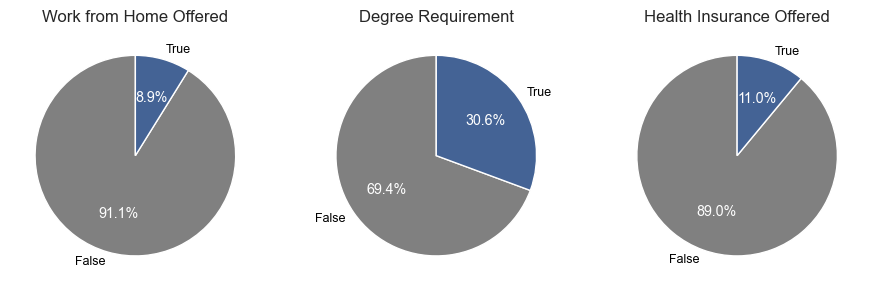

In [112]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

palette = ['gray', sns.color_palette("dark:b_r")[1]]
labels = ['False', 'True']

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    wedges, texts, autotexts = ax[i].pie(
        df[column].value_counts(),
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=palette,
        textprops={'color': 'white', 'fontsize': 10.25}
    )
    for text in texts:
        text.set_color('black')
        text.set_fontsize(9)
    ax[i].set_title(title)

plt.show()

## Exploratory Data Analysis for Data Analysts in the US

### Filter for US Data Analyst roles

In [113]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

### Locations to Explore:

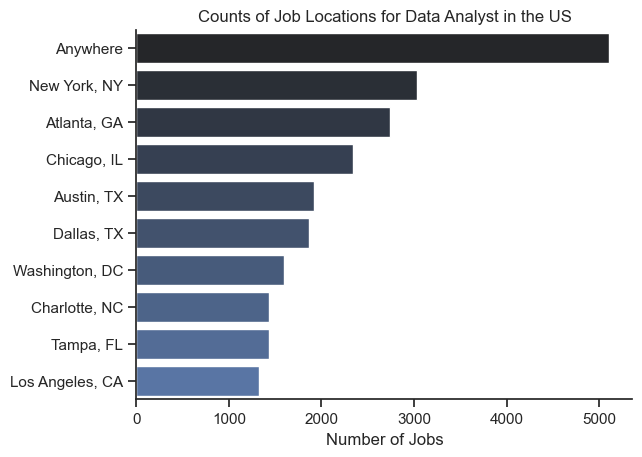

In [114]:
df_plot = df_DA_US['job_location'].value_counts().head(10).reset_index()
df_plot.columns = ['job_location', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', dodge=False)
plt.legend().set_visible(False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

<function matplotlib.pyplot.show(close=None, block=None)>

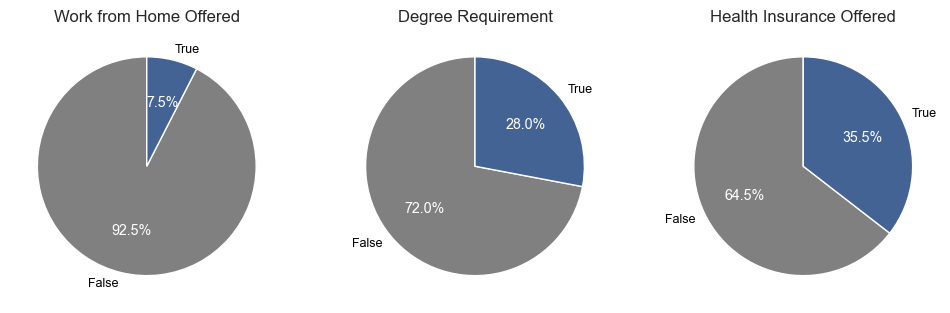

In [115]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

palette = ['gray', sns.color_palette("dark:b_r")[1]]

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    wedges, texts, autotexts = ax[i].pie(
        df_DA_US[column].value_counts(),
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90,
        colors=palette,
        textprops={'color': 'white', 'fontsize': 10.25}
    )
    for text in texts:
        text.set_color('black')
        text.set_fontsize(9)
    ax[i].set_title(title)

plt.show

### Companies to Explore:

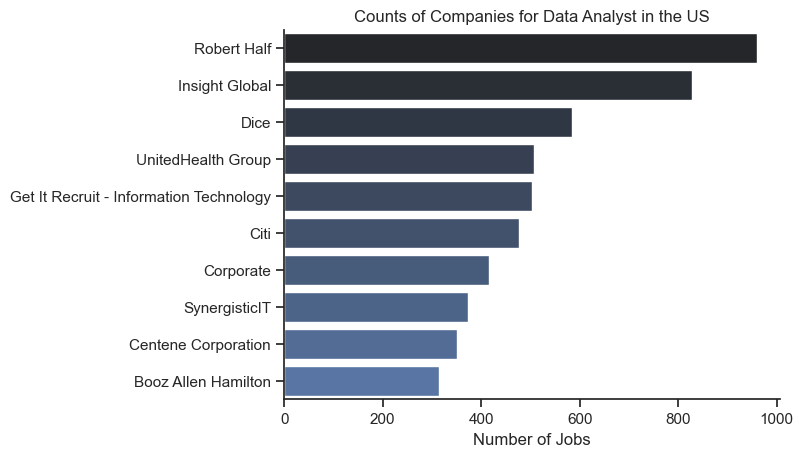

In [116]:
df_plot = df_DA_US['company_name'].value_counts().head(10).reset_index()
df_plot.columns = ['company_name', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', dodge=False)
plt.legend().set_visible(False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()